In [6]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

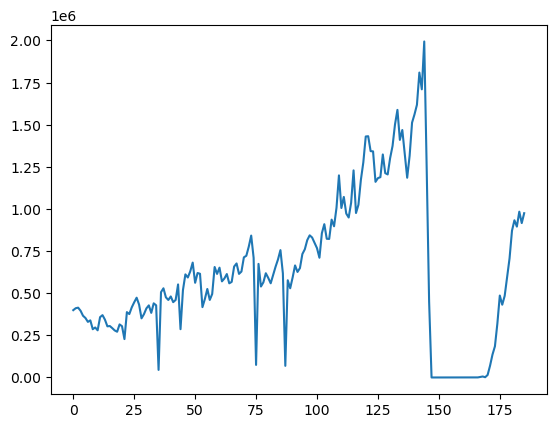

In [7]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TOPIC AND SENTIMENT INTENSITY - DATA COMPOSITION 2 (80-10-10).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [9]:
train_size = 148
validation_size = 19
test_size = 19

In [10]:
train = df1[0:148, :]
train.shape

(148, 1)

In [11]:
validation = df1[148:167, :]
validation.shape

(19, 1)

In [12]:
test = df1[167:186, :]
test.shape

(19, 1)

In [13]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [15]:
x_test, y_test = get_data(test, look_back)

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [17]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(24, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.0005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

2023-08-21 10:56:36.019186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
146/146 [==============================] - 2s 2ms/step - loss: 0.1112
Epoch 2/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 3/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 4/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 5/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 6/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 7/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 8/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 9/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 10/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 11/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 12/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 13/50
146/146 [====

In [18]:
y_pred = model.predict(x_test)

1/1 [==============================] - 1s 502ms/step


In [19]:
scaler.scale_

array([5.01473077e-07])

In [20]:
y_pred = scaler.inverse_transform(y_pred)

In [21]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [22]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 91078.14075873543


In [24]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 78656.29549632352


In [25]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 5.7360960005624495


In [26]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 45.20373632892077


In [27]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 1778.4574384665784


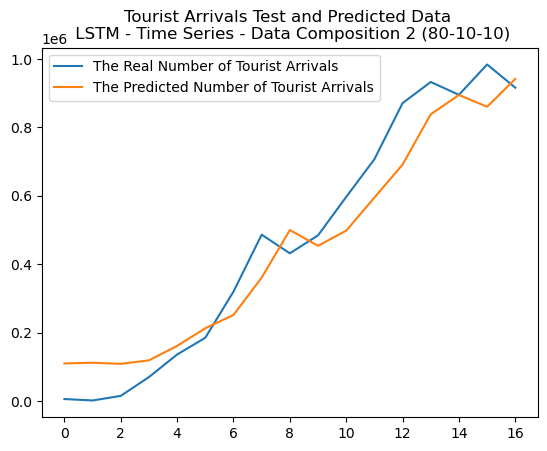

In [28]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series - Data Composition 2 (80-10-10)")
plt.legend()
plt.show()